Files already downloaded and verified
Epoch [1/5], Batch [100/391], D Loss: 0.4787, G Loss: 1.9812
Epoch [1/5], Batch [200/391], D Loss: 0.1034, G Loss: 2.4808
Epoch [1/5], Batch [300/391], D Loss: 0.0483, G Loss: 8.7101


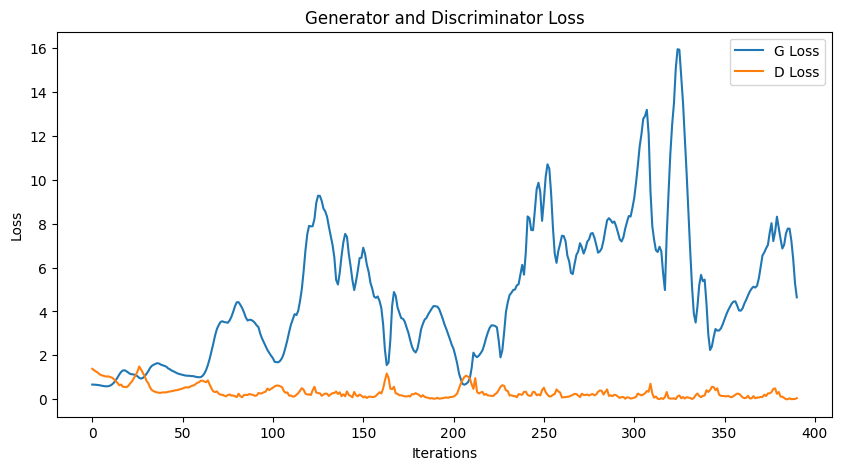

Epoch [2/5], Batch [100/391], D Loss: 0.3844, G Loss: 18.6018
Epoch [2/5], Batch [200/391], D Loss: 0.1570, G Loss: 39.0037
Epoch [2/5], Batch [300/391], D Loss: 0.0404, G Loss: 55.9623


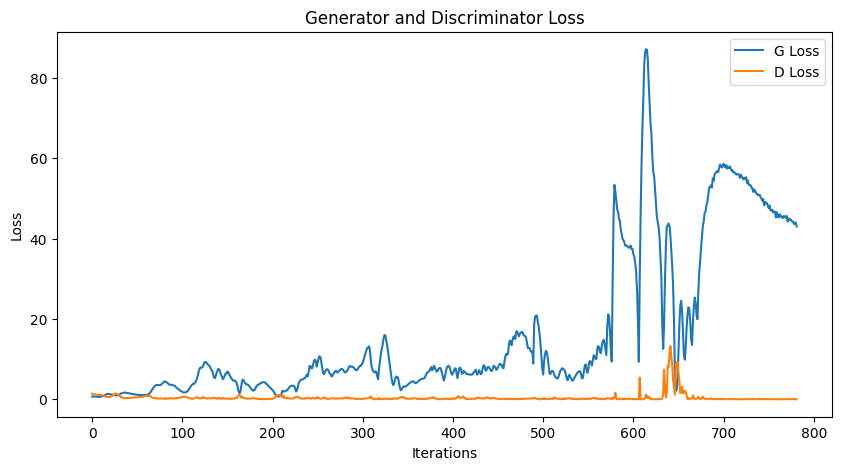

Epoch [3/5], Batch [100/391], D Loss: 0.0068, G Loss: 100.0000
Epoch [3/5], Batch [200/391], D Loss: 0.0001, G Loss: 100.0000
Epoch [3/5], Batch [300/391], D Loss: 0.0000, G Loss: 100.0000


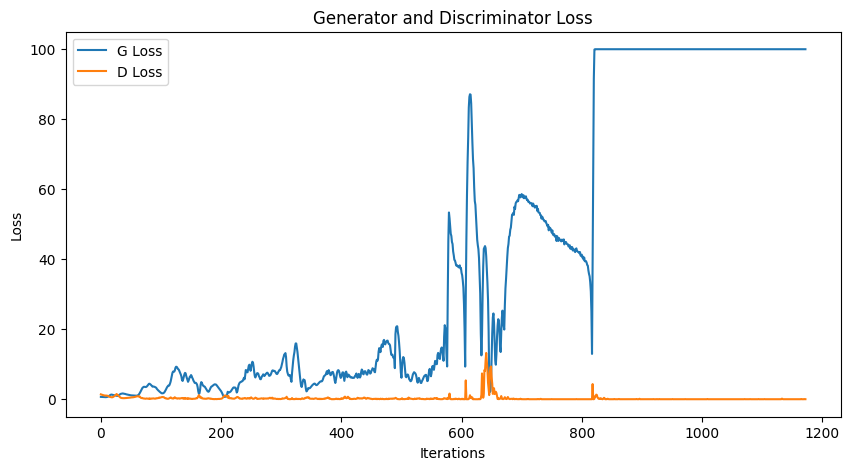

Epoch [4/5], Batch [100/391], D Loss: 0.0000, G Loss: 100.0000
Epoch [4/5], Batch [200/391], D Loss: 0.0028, G Loss: 100.0000
Epoch [4/5], Batch [300/391], D Loss: 0.0000, G Loss: 100.0000


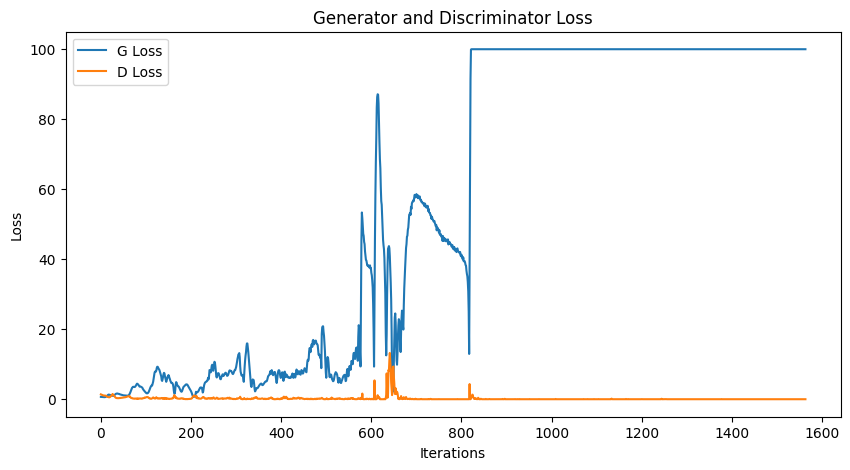

Epoch [5/5], Batch [100/391], D Loss: 0.0002, G Loss: 100.0000
Epoch [5/5], Batch [200/391], D Loss: 0.0000, G Loss: 100.0000
Epoch [5/5], Batch [300/391], D Loss: 0.0000, G Loss: 100.0000


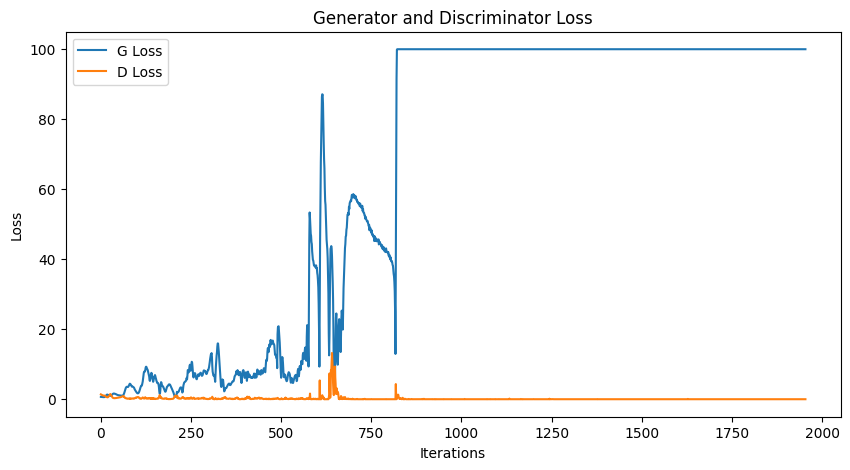

In [7]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),   # Input: 100-dimensional random noise
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3 * 32 * 32),  # Output: 3*32*32 tensor (CIFAR-10 image size)
            nn.Tanh()  # Output values are between -1 and 1
        )

    def forward(self, x):
        return self.fc(x).view(x.size(0), 3, 32, 32)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),  # Input: 3*32*32 tensor (CIFAR-10 image size)
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),  # Output: 1 for real, 0 for fake
            nn.Sigmoid()  # Output will be a probability value
        )

    def forward(self, x):
        return self.fc(x.view(x.size(0), -1))


# Initialize the models
generator = Generator()
discriminator = Discriminator()

# Define loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Lists to store losses for plotting
d_losses = []
g_losses = []

# Data loading and preprocessing (using CIFAR-10 dataset)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Training loop
def train_gan(generator, discriminator, dataloader, num_epochs):
    for epoch in range(num_epochs):
        for i, data in enumerate(dataloader):
            real_images, _ = data
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1)
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            # Train the discriminator
            optimizer_D.zero_grad()
            outputs = discriminator(real_images)
            d_loss_real = criterion(outputs, real_labels)
            d_loss_real.backward()

            z = torch.randn(batch_size, 100)
            fake_images = generator(z)
            outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs, fake_labels)
            d_loss_fake.backward()
            d_loss = d_loss_real + d_loss_fake
            optimizer_D.step()

            # Train the generator
            optimizer_G.zero_grad()
            outputs = discriminator(fake_images)
            g_loss = criterion(outputs, real_labels)
            g_loss.backward()
            optimizer_G.step()

            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

        # Generate and save a sample of fake images
        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                z = torch.randn(32, 100)
                fake_samples = generator(z)
                vutils.save_image(fake_samples, f'fake_cifar_samples_epoch_{epoch+1}_0.png', normalize=True)

        # Plot the loss curves
        plt.figure(figsize=(10, 5))
        plt.title("Generator and Discriminator Loss")
        plt.plot(g_losses, label="G Loss")
        plt.plot(d_losses, label="D Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f'loss_plot_epoch_{epoch+1}.png')
        plt.show()

# Main training loop
train_gan(generator, discriminator, dataloader, num_epochs=5)

Files already downloaded and verified
Epoch [1/5], Batch [100/391], D Loss: 0.7889, G Loss: 0.8758
Epoch [1/5], Batch [200/391], D Loss: 0.6639, G Loss: 0.9393
Epoch [1/5], Batch [300/391], D Loss: 0.5992, G Loss: 1.2257


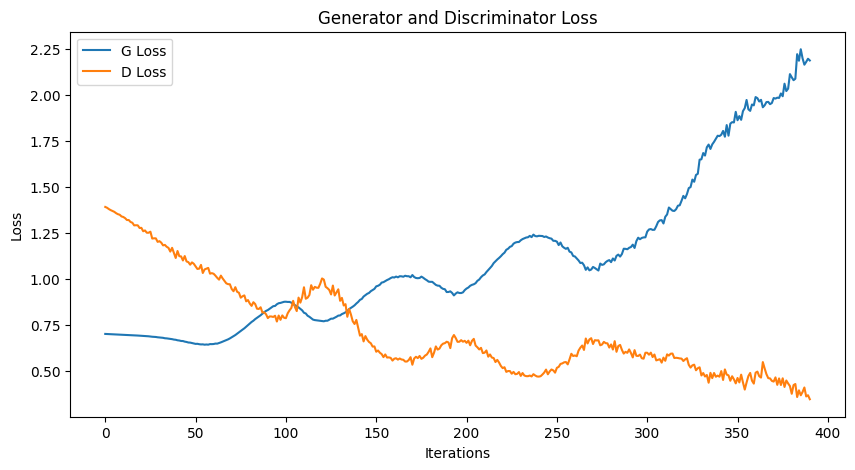

Epoch [2/5], Batch [100/391], D Loss: 0.2134, G Loss: 1.9890
Epoch [2/5], Batch [200/391], D Loss: 0.2312, G Loss: 1.7577
Epoch [2/5], Batch [300/391], D Loss: 0.2283, G Loss: 1.7135


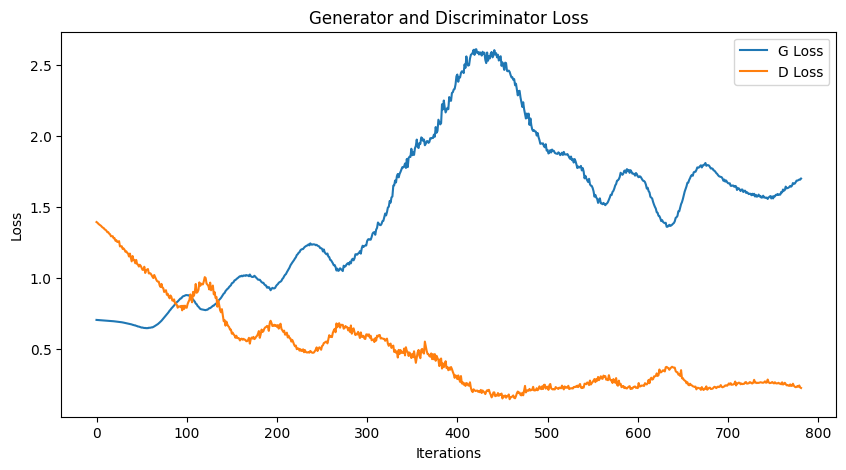

Epoch [3/5], Batch [100/391], D Loss: 0.1753, G Loss: 2.1308
Epoch [3/5], Batch [200/391], D Loss: 0.1312, G Loss: 2.3360
Epoch [3/5], Batch [300/391], D Loss: 0.1024, G Loss: 2.8501


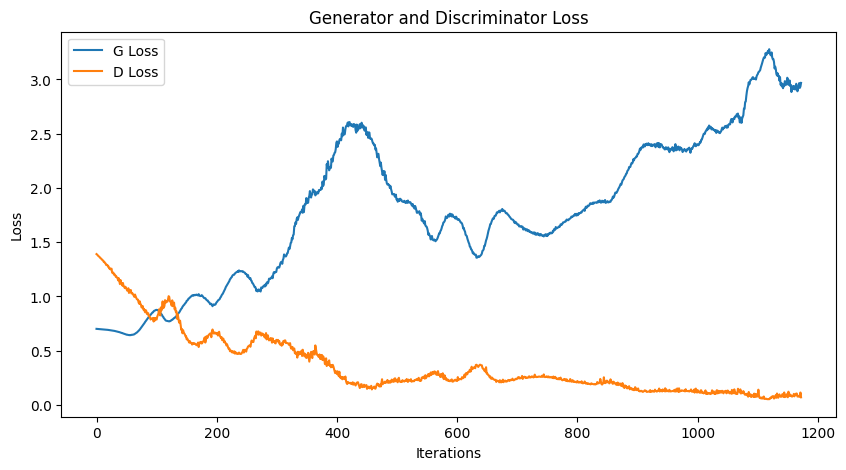

Epoch [4/5], Batch [100/391], D Loss: 0.0652, G Loss: 3.4717
Epoch [4/5], Batch [200/391], D Loss: 0.0415, G Loss: 4.3866
Epoch [4/5], Batch [300/391], D Loss: 0.0242, G Loss: 5.7559


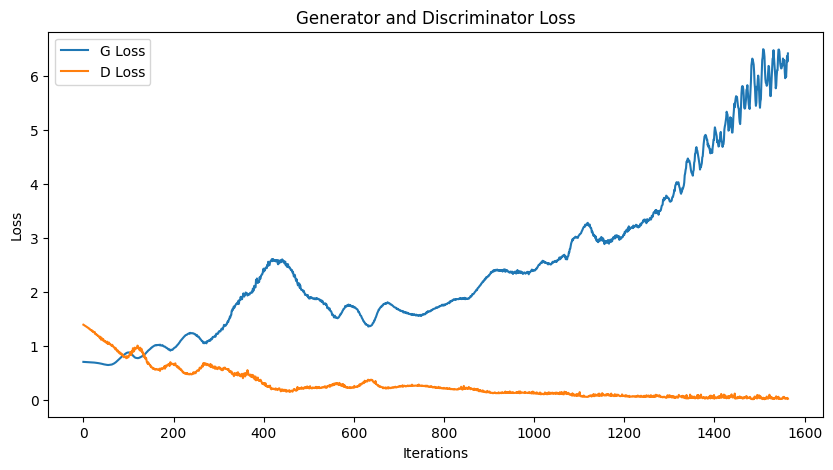

Epoch [5/5], Batch [100/391], D Loss: 0.0401, G Loss: 7.2511
Epoch [5/5], Batch [200/391], D Loss: 0.0198, G Loss: 7.2433
Epoch [5/5], Batch [300/391], D Loss: 0.0146, G Loss: 7.4745


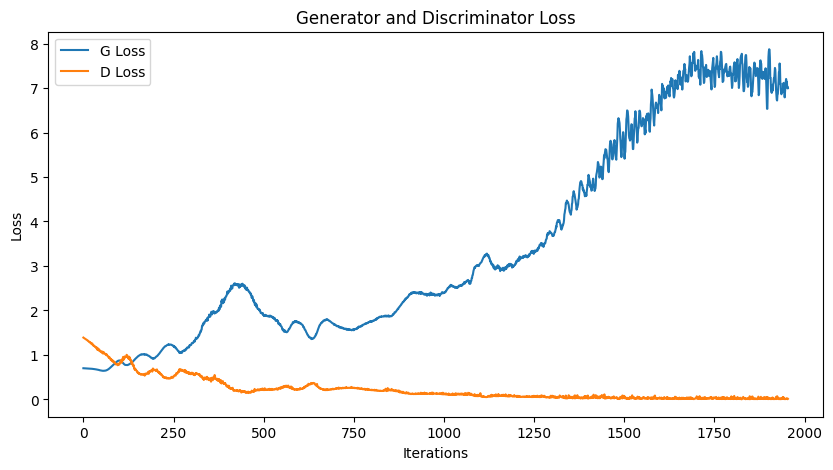

In [8]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),   # Input: 100-dimensional random noise
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3 * 32 * 32),  # Output: 3*32*32 tensor (CIFAR-10 image size)
            nn.Tanh()  # Output values are between -1 and 1
        )

    def forward(self, x):
        return self.fc(x).view(x.size(0), 3, 32, 32)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),  # Input: 3*32*32 tensor (CIFAR-10 image size)
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),  # Output: 1 for real, 0 for fake
            nn.Sigmoid()  # Output will be a probability value
        )

    def forward(self, x):
        return self.fc(x.view(x.size(0), -1))


# Initialize the models
generator = Generator()
discriminator = Discriminator()

# Define loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.00002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.00002)

# Lists to store losses for plotting
d_losses = []
g_losses = []

# Data loading and preprocessing (using CIFAR-10 dataset)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Training loop
def train_gan(generator, discriminator, dataloader, num_epochs):
    for epoch in range(num_epochs):
        for i, data in enumerate(dataloader):
            real_images, _ = data
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1)
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            # Train the discriminator
            optimizer_D.zero_grad()
            outputs = discriminator(real_images)
            d_loss_real = criterion(outputs, real_labels)
            d_loss_real.backward()

            z = torch.randn(batch_size, 100)
            fake_images = generator(z)
            outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs, fake_labels)
            d_loss_fake.backward()
            d_loss = d_loss_real + d_loss_fake
            optimizer_D.step()

            # Train the generator
            optimizer_G.zero_grad()
            outputs = discriminator(fake_images)
            g_loss = criterion(outputs, real_labels)
            g_loss.backward()
            optimizer_G.step()

            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

        # Generate and save a sample of fake images
        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                z = torch.randn(32, 100)
                fake_samples = generator(z)
                vutils.save_image(fake_samples, f'fake_cifar_samples_epoch_{epoch+1}_1.png', normalize=True)

        # Plot the loss curves
        plt.figure(figsize=(10, 5))
        plt.title("Generator and Discriminator Loss")
        plt.plot(g_losses, label="G Loss")
        plt.plot(d_losses, label="D Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f'loss_plot_epoch_{epoch+1}.png')
        plt.show()

# Main training loop
train_gan(generator, discriminator, dataloader, num_epochs=5)

Files already downloaded and verified
Epoch [1/20], Batch [100/391], D Loss: 0.9313, G Loss: 0.7820
Epoch [1/20], Batch [200/391], D Loss: 0.3501, G Loss: 2.2141
Epoch [1/20], Batch [300/391], D Loss: 0.3110, G Loss: 3.0771


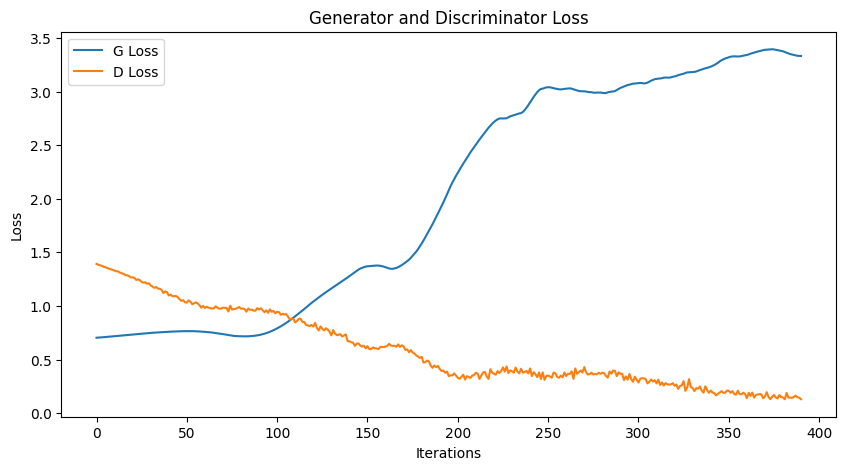

Epoch [2/20], Batch [100/391], D Loss: 0.1301, G Loss: 3.0986
Epoch [2/20], Batch [200/391], D Loss: 0.2324, G Loss: 2.3318
Epoch [2/20], Batch [300/391], D Loss: 0.1522, G Loss: 2.4776


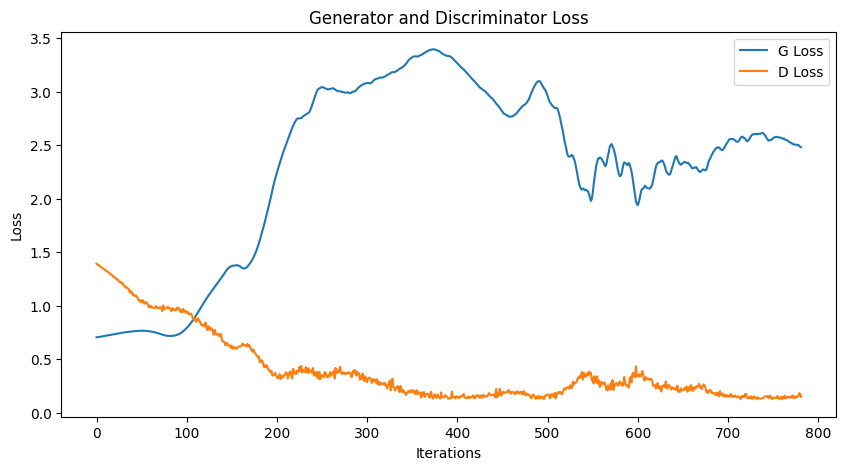

Epoch [3/20], Batch [100/391], D Loss: 0.1258, G Loss: 2.4509
Epoch [3/20], Batch [200/391], D Loss: 0.1748, G Loss: 2.0361
Epoch [3/20], Batch [300/391], D Loss: 0.1923, G Loss: 1.9310


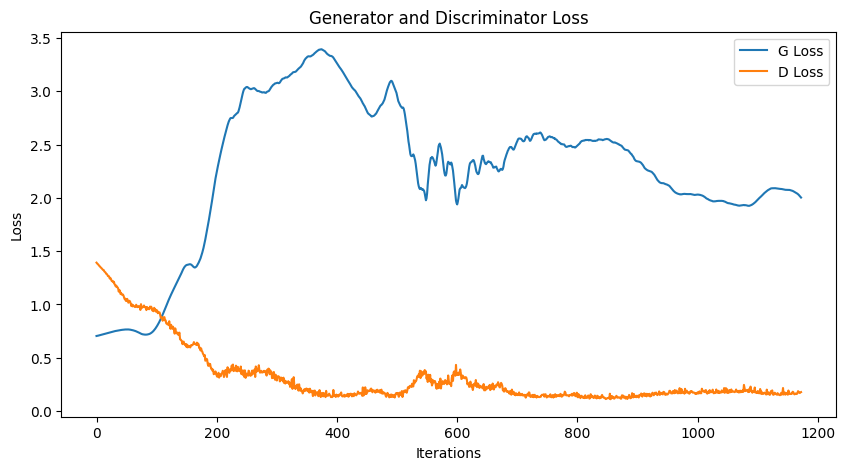

Epoch [4/20], Batch [100/391], D Loss: 0.1158, G Loss: 2.4340
Epoch [4/20], Batch [200/391], D Loss: 0.0964, G Loss: 3.2320
Epoch [4/20], Batch [300/391], D Loss: 0.0687, G Loss: 4.0957


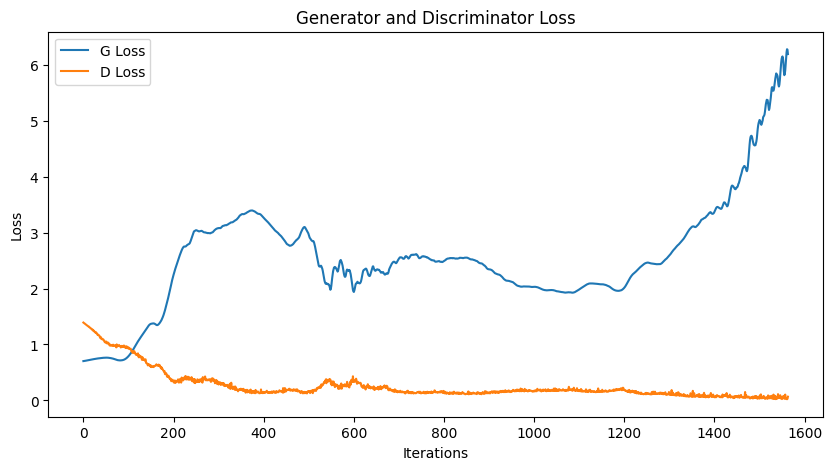

Epoch [5/20], Batch [100/391], D Loss: 0.0178, G Loss: 6.9500
Epoch [5/20], Batch [200/391], D Loss: 0.0394, G Loss: 7.7161
Epoch [5/20], Batch [300/391], D Loss: 0.0254, G Loss: 7.2621


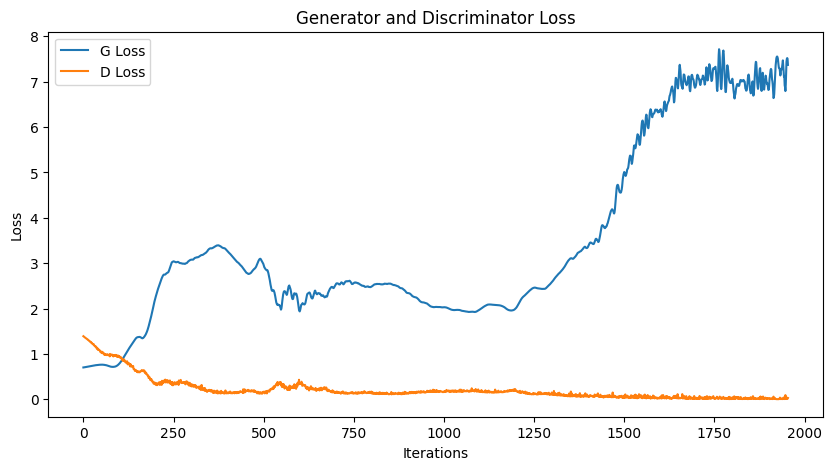

Epoch [6/20], Batch [100/391], D Loss: 0.0181, G Loss: 7.3891
Epoch [6/20], Batch [200/391], D Loss: 0.0055, G Loss: 7.7856
Epoch [6/20], Batch [300/391], D Loss: 0.0087, G Loss: 7.4162


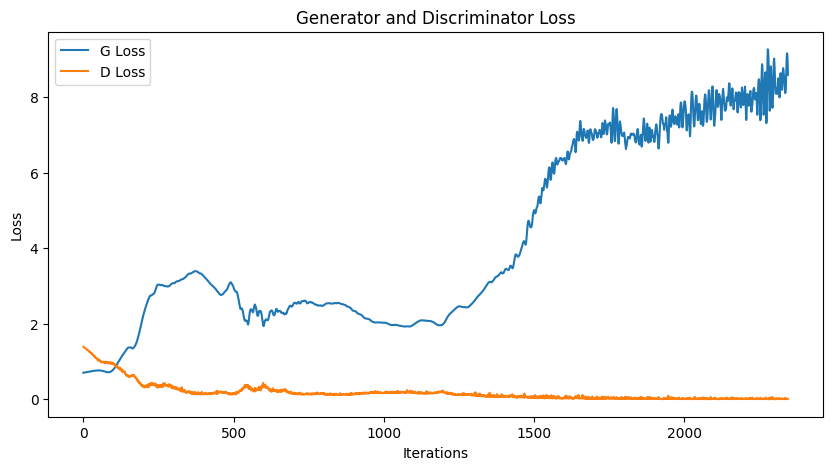

Epoch [7/20], Batch [100/391], D Loss: 0.0089, G Loss: 8.5565
Epoch [7/20], Batch [200/391], D Loss: 0.0047, G Loss: 9.7342
Epoch [7/20], Batch [300/391], D Loss: 0.0019, G Loss: 9.5957


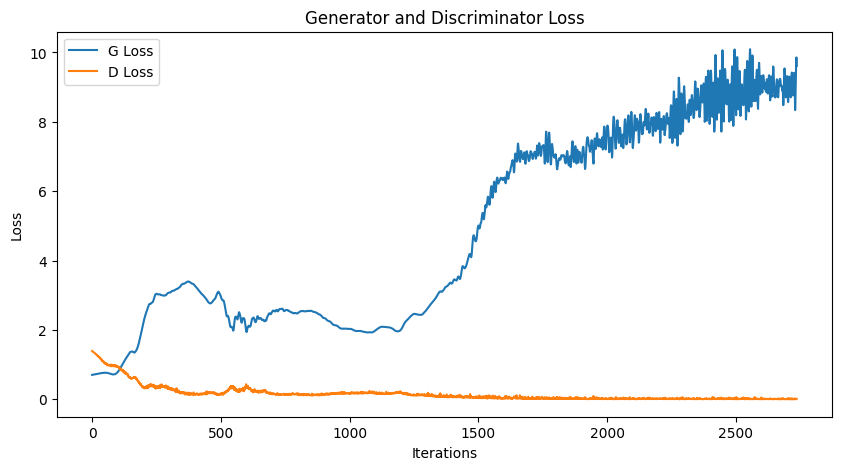

Epoch [8/20], Batch [100/391], D Loss: 0.0119, G Loss: 8.9359
Epoch [8/20], Batch [200/391], D Loss: 0.0022, G Loss: 9.1434
Epoch [8/20], Batch [300/391], D Loss: 0.0098, G Loss: 8.9615


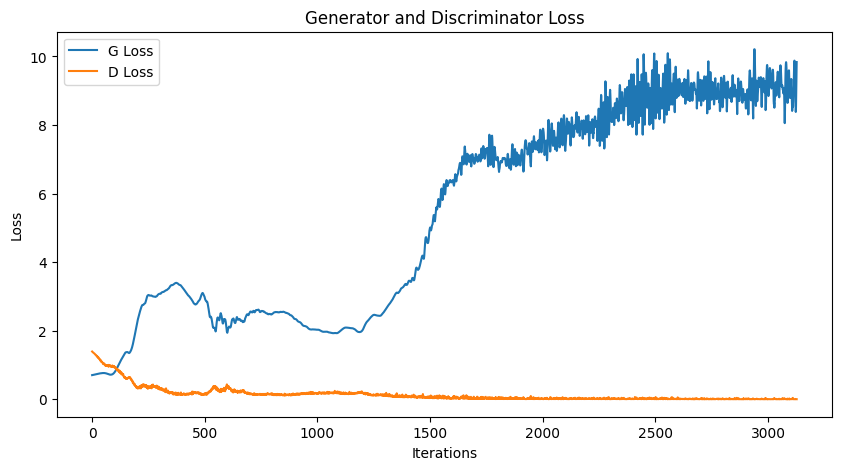

Epoch [9/20], Batch [100/391], D Loss: 0.0016, G Loss: 9.5837
Epoch [9/20], Batch [200/391], D Loss: 0.0009, G Loss: 9.3692
Epoch [9/20], Batch [300/391], D Loss: 0.0009, G Loss: 10.0005


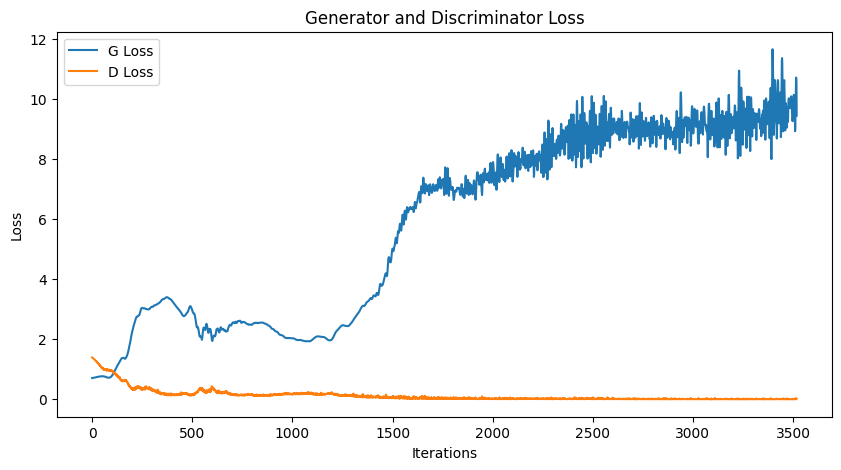

Epoch [10/20], Batch [100/391], D Loss: 0.0024, G Loss: 10.1765
Epoch [10/20], Batch [200/391], D Loss: 0.0019, G Loss: 9.1850
Epoch [10/20], Batch [300/391], D Loss: 0.0037, G Loss: 10.2562


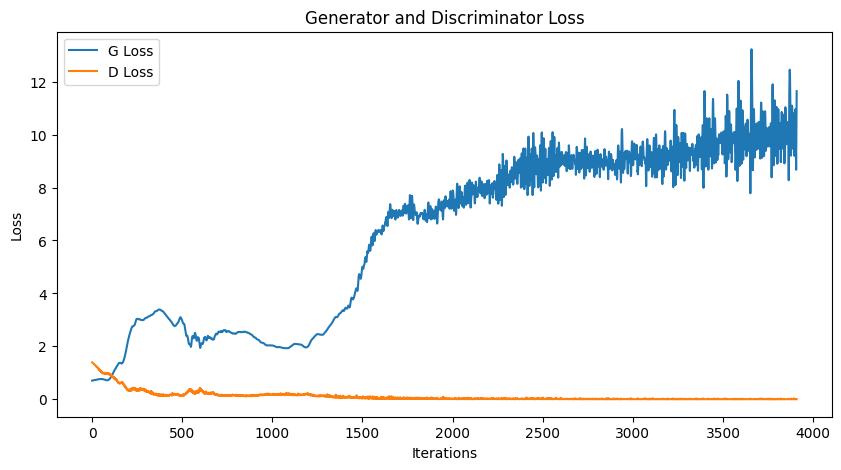

Epoch [11/20], Batch [100/391], D Loss: 0.0020, G Loss: 9.5683
Epoch [11/20], Batch [200/391], D Loss: 0.0004, G Loss: 10.6738
Epoch [11/20], Batch [300/391], D Loss: 0.0005, G Loss: 10.0459


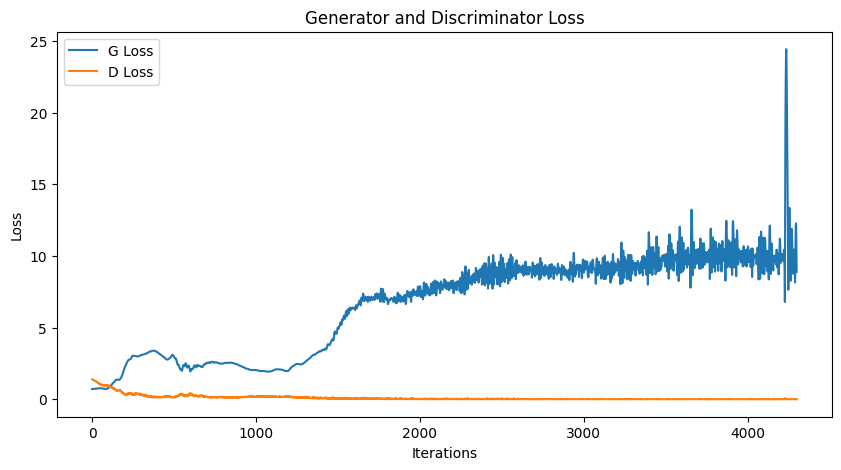

Epoch [12/20], Batch [100/391], D Loss: 0.0004, G Loss: 11.4160
Epoch [12/20], Batch [200/391], D Loss: 0.0016, G Loss: 8.8611
Epoch [12/20], Batch [300/391], D Loss: 0.0075, G Loss: 9.0075


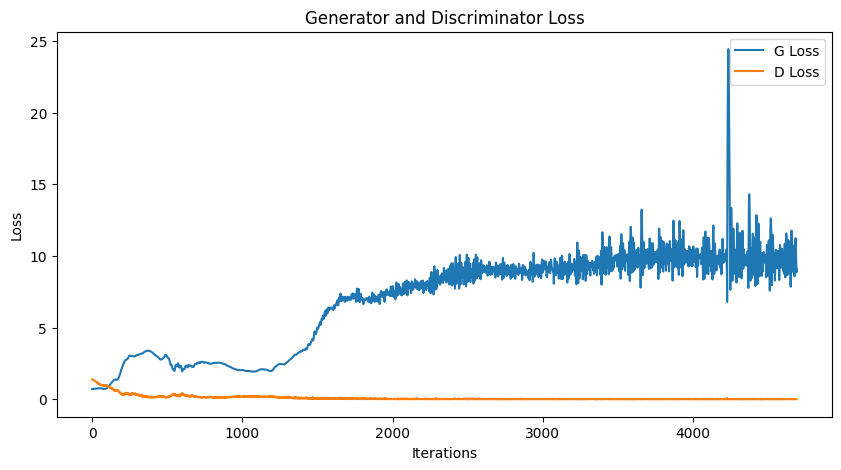

Epoch [13/20], Batch [100/391], D Loss: 0.0078, G Loss: 8.6753
Epoch [13/20], Batch [200/391], D Loss: 0.0073, G Loss: 9.8815
Epoch [13/20], Batch [300/391], D Loss: 0.0076, G Loss: 9.3784


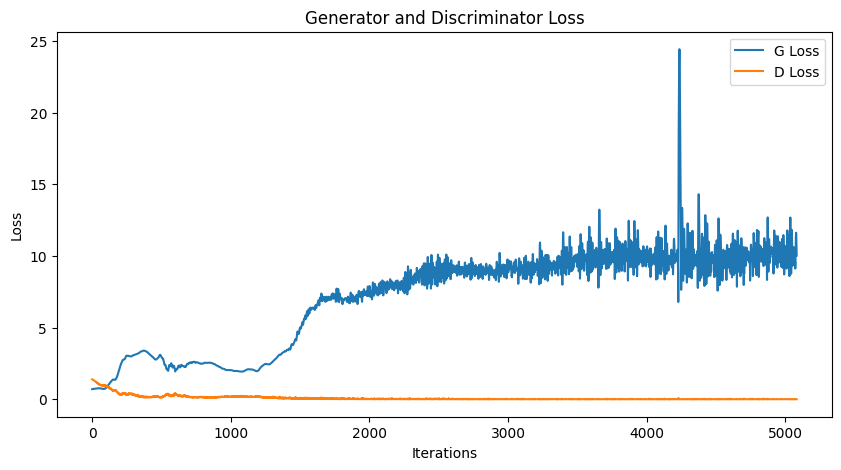

Epoch [14/20], Batch [100/391], D Loss: 0.0001, G Loss: 11.2478
Epoch [14/20], Batch [200/391], D Loss: 0.0000, G Loss: 48.9815
Epoch [14/20], Batch [300/391], D Loss: 0.0002, G Loss: 48.8897


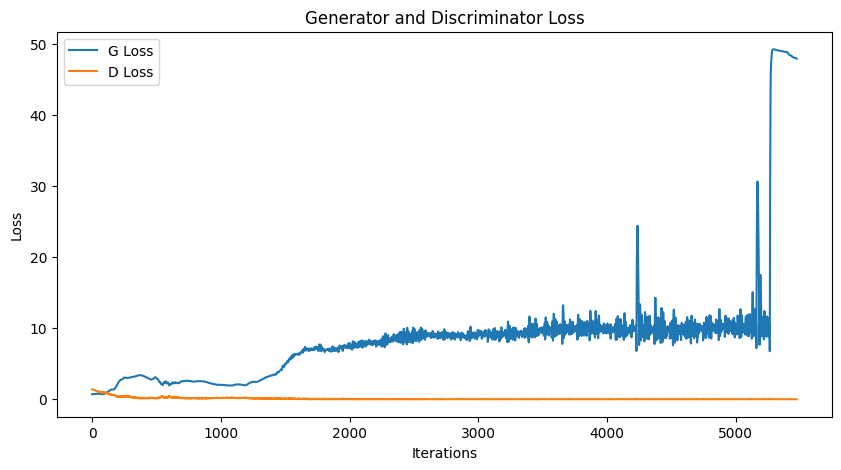

Epoch [15/20], Batch [100/391], D Loss: 0.0000, G Loss: 47.4103
Epoch [15/20], Batch [200/391], D Loss: 0.0000, G Loss: 47.1808
Epoch [15/20], Batch [300/391], D Loss: 0.0000, G Loss: 46.7048


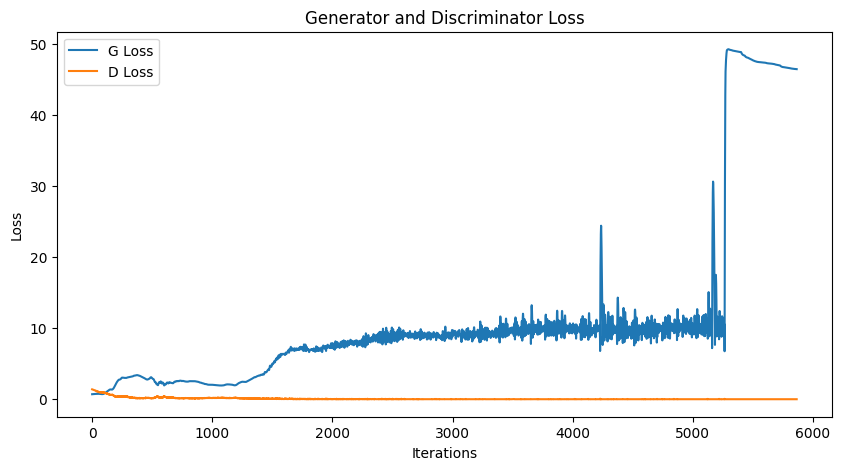

Epoch [16/20], Batch [100/391], D Loss: 0.0000, G Loss: 46.2436
Epoch [16/20], Batch [200/391], D Loss: 0.0000, G Loss: 45.9689
Epoch [16/20], Batch [300/391], D Loss: 0.0000, G Loss: 45.6442


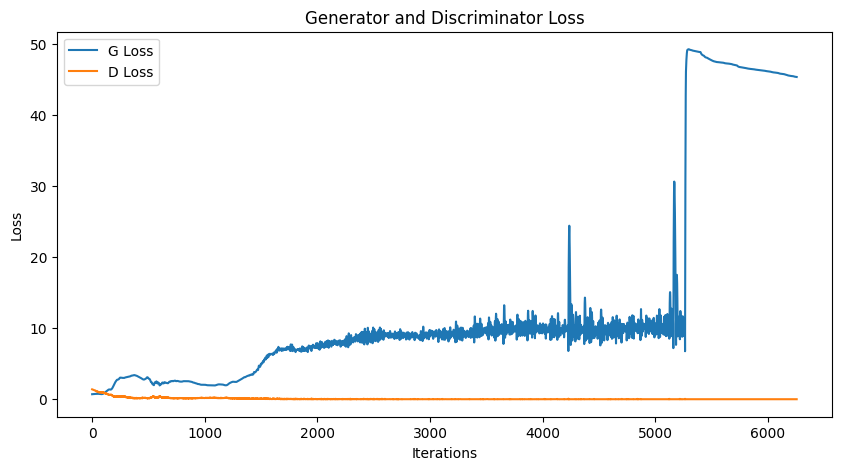

Epoch [17/20], Batch [100/391], D Loss: 0.0000, G Loss: 45.0745
Epoch [17/20], Batch [200/391], D Loss: 0.0000, G Loss: 44.8440
Epoch [17/20], Batch [300/391], D Loss: 0.0000, G Loss: 44.5807


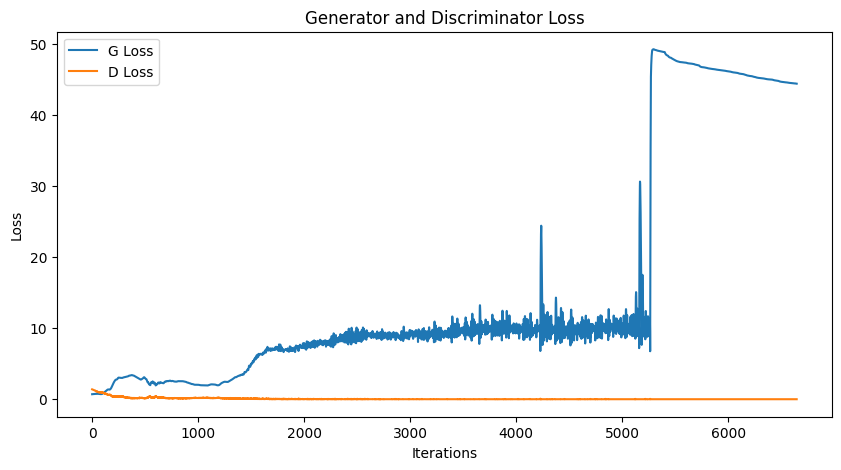

Epoch [18/20], Batch [100/391], D Loss: 0.0000, G Loss: 44.1851
Epoch [18/20], Batch [200/391], D Loss: 0.0000, G Loss: 43.9770
Epoch [18/20], Batch [300/391], D Loss: 0.0000, G Loss: 43.7433


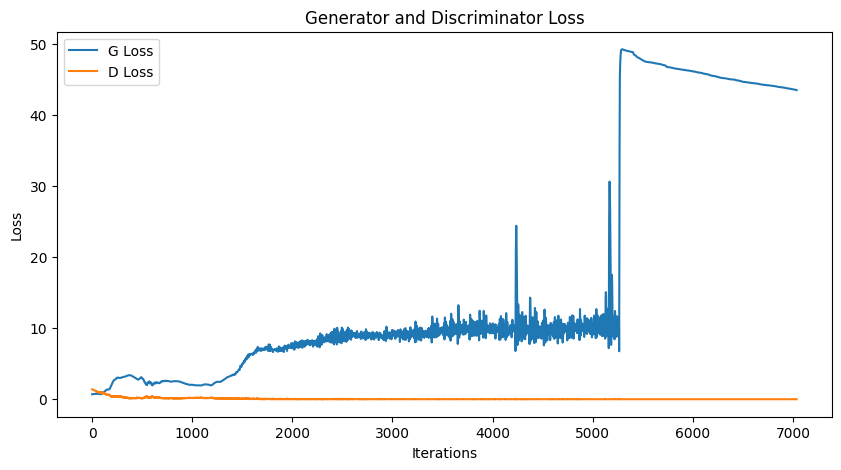

Epoch [19/20], Batch [100/391], D Loss: 0.0000, G Loss: 43.1688
Epoch [19/20], Batch [200/391], D Loss: 0.0000, G Loss: 42.9567
Epoch [19/20], Batch [300/391], D Loss: 0.0000, G Loss: 42.8048


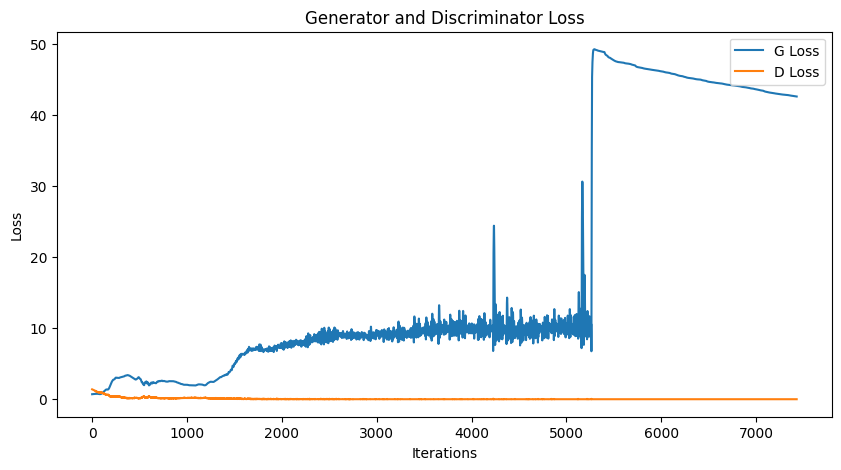

Epoch [20/20], Batch [100/391], D Loss: 0.0000, G Loss: 42.3516
Epoch [20/20], Batch [200/391], D Loss: 0.0000, G Loss: 42.0779
Epoch [20/20], Batch [300/391], D Loss: 0.0000, G Loss: 41.8590


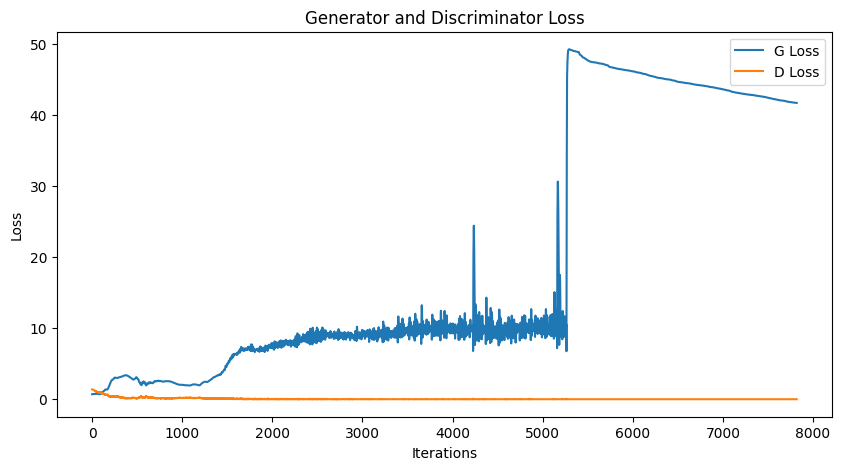

In [10]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),   # Input: 100-dimensional random noise
            nn.Sigmoid(),
            nn.Linear(256, 512),
            nn.Sigmoid(),
            nn.Linear(512, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, 3 * 32 * 32),  # Output: 3*32*32 tensor (CIFAR-10 image size)
            nn.Tanh()  # Output values are between -1 and 1
        )

    def forward(self, x):
        return self.fc(x).view(x.size(0), 3, 32, 32)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),  # Input: 3*32*32 tensor (CIFAR-10 image size)
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),  # Output: 1 for real, 0 for fake
            nn.Sigmoid()  # Output will be a probability value
        )

    def forward(self, x):
        return self.fc(x.view(x.size(0), -1))


# Initialize the models
generator = Generator()
discriminator = Discriminator()

# Define loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.00002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.00002)

# Lists to store losses for plotting
d_losses = []
g_losses = []

# Data loading and preprocessing (using CIFAR-10 dataset)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Training loop
def train_gan(generator, discriminator, dataloader, num_epochs):
    for epoch in range(num_epochs):
        for i, data in enumerate(dataloader):
            real_images, _ = data
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1)
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            # Train the discriminator
            optimizer_D.zero_grad()
            outputs = discriminator(real_images)
            d_loss_real = criterion(outputs, real_labels)
            d_loss_real.backward()

            z = torch.randn(batch_size, 100)
            fake_images = generator(z)
            outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs, fake_labels)
            d_loss_fake.backward()
            d_loss = d_loss_real + d_loss_fake
            optimizer_D.step()

            # Train the generator
            optimizer_G.zero_grad()
            outputs = discriminator(fake_images)
            g_loss = criterion(outputs, real_labels)
            g_loss.backward()
            optimizer_G.step()

            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

        # Generate and save a sample of fake images
        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                z = torch.randn(32, 100)
                fake_samples = generator(z)
                vutils.save_image(fake_samples, f'fake_cifar_samples_epoch_{epoch+1}_2.png', normalize=True)

        # Plot the loss curves
        plt.figure(figsize=(10, 5))
        plt.title("Generator and Discriminator Loss")
        plt.plot(g_losses, label="G Loss")
        plt.plot(d_losses, label="D Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f'loss_plot_epoch_{epoch+1}.png')
        plt.show()

# Main training loop
train_gan(generator, discriminator, dataloader, num_epochs=20)